# Best Tablet in Flipkart

### Importing Required Modules

In [38]:
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

### Web Scraping using Regex

In [9]:
title = []
price = []
ratings = []
rom = []
color = []
inch = []
pc = []
front = []
battery = []
warranty = []
cm = []
wifi = []
for i in range(1,26):
    url = f"https://www.flipkart.com/search?q=tablets&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"
    request_header = {'Content-Type': 'text/html; charset=UTF-8','User-Agent': 'Chrome/101.0.0.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0','Accept-Encoding': 'gzip, deflate, br'}

    page = requests.get(url,headers =request_header)
    soup = BeautifulSoup(page.text)
    
    for i in soup.find_all("div",class_='tUxRFH'):
        
        #title
        Title = i.find('div',class_='KzDlHZ')
        if Title:
            text1 = Title.text
            regex1 = re.findall('\w+',text1)
            if regex1:
                title.append(regex1[0])
            else:
                title.append(np.nan)
                
        # price
        Price = i.find('div',class_='Nx9bqj _4b5DiR')
        if Price:
            text2 = Price.text
            text_replace = text2.replace('₹','').replace(',','')
            price.append(text_replace)
                
        #ratings
        Ratings = i.find('div',class_='XQDdHH')
        if Ratings:
            text3 = Ratings.text
            ratings.append(text3)
        else:
            ratings.append(np.nan)
            
        """#ram
        Ram = i.find('div',class_='KzDlHZ')
        if Ram:
            text4 = Ram.text
            regex4 = re.findall('(\d+)\sGB RAM',text4)
            if regex4:
                ram.append(regex4[0])
            else:
                ram.append(np.nan)"""
                
        #rom
        Rom = i.find('div',class_='KzDlHZ')
        if Rom:
            text5 = Rom.text
            regex5 = re.findall('(\d+)\sGB ROM',text5)
            if regex5:
                rom.append(regex5[0])
            else:
                rom.append(np.nan)
                
        #color
        Color = i.find('div',class_='KzDlHZ')
        if Color:
            text6 = Color.text
            regex6 = re.findall('\s\(([^\d]\w+\s?\w+)\)',text6)
            if regex6:
                color.append(regex6[0])
            else:
                color.append(np.nan)
                
        """#inch
        Inch = i.find('div',class_='_6NESgJ')
        if Inch:
            text7 = Inch.text
            regex7 = re.findall('\((\d+\.\d+)\s\w+\)',text7)
            if regex7:
                inch.append(regex7[0])
            else:
                inch.append(np.nan)"""
                
        #pc
        Pc = i.find('div',class_='_6NESgJ')
        if Pc:
            text8 = Pc.text
            regex8 = re.findall('Display(\d.+|\d+) MP Primary Camera',text8)
            if regex8:
                pc.append(regex8[0])
            else:
                pc.append(np.nan)
                
        #front 
        Front = i.find('div',class_='_6NESgJ')
        if Front:
            text9 = Front.text
            regex9 = re.findall('(\d+) MP Front',text9)
            if regex9:
                front.append(regex9[0])
            else:
                front.append(np.nan)
                
        #battery
        Battery = i.find('div',class_='_6NESgJ')
        if Battery:
            text10 = Battery.text
            regex10 = re.findall('Battery:\s(\d+)\s\w+',text10)
            if regex10:
                battery.append(regex10[0])
            else:
                battery.append(np.nan)
                
        #warranty
        Warranty = i.find('div',class_='_6NESgJ')
        if Warranty:
            text11 = Warranty.text
            regex11 = re.findall('(\d)\sYear',text11)
            if regex11:
                warranty.append(regex11[0])
            else:
                warranty.append(np.nan)
                
        #cm
        Cm = i.find('div',class_='_6NESgJ')
        if Cm:
            text12 = Cm.text
            regex12 = re.findall('(\d+\.\d+\s)cm',text12)
            if regex12:
                cm.append(regex12[0])
            else:
                cm.append(np.nan)
                
                                 
        #wifi        
        Wifi = i.find('div',class_='KzDlHZ')
        if Wifi:
            text13 = Wifi.text
            regex13 = re.findall('with\s(\w+-\w+\+?\w+)\s',text13)
            if regex13:
                wifi.append(regex13[0])
            else:
                wifi.append(np.nan)

In [10]:
Dict1 = {'Brand':title,'Storage':rom,"Color":color,'Display_Cm':cm,
         'Primary_Camera':pc,'Front_Camera':front,'Battery':battery,'Warranty':warranty,
         'Wifi':wifi,'Ratings':ratings,'Price':price}

In [11]:
df1 = pd.DataFrame(Dict1)
df1

,Brand,Storage,Color,Display_Cm,Primary_Camera,Front_Camera,Battery,Warranty,Wifi,Ratings,Price
0,Lenovo,128,Storm Grey,26.95,8,8,7700,1,Wi-Fi+4G,4.3,15499
1,Lenovo,128,Seafoam Green,27.81,13,8,7040,1,Wi-Fi+4G,4.3,21999
2,REDMI,128,Graphite Gray,26.95,8.0,8,8000,1,Wi-Fi,4.4,14999
3,SAMSUNG,128,Graphite,27.94,8.0,5,5100,1,Wi-Fi+5G,4.5,24999
4,MOTOROLA,128,Frost Blue,26.95,8.0,8,7700,1,Wi-Fi+4G,4.2,12999
...,...,...,...,...,...,...,...,...,...,...,...
595,Apple,32,Space Grey,24.64,8.0,2,NaN,1,Wi-Fi,4.6,28000
596,Alcatel,16,Volcano Black,17.78,8,5,4000,1,Wi-Fi+4G,3.6,6999
597,SAMSUNG,128,Mystic Bronze,31.5,13,8,10090,1,Wi-Fi,4.7,51999
598,Apple,128,Gold,20.07,8.0,NaN,NaN,1,Wi-Fi,4.4,33800


### EDA Process

In [12]:
df1.describe()

,Brand,Storage,Color,Display_Cm,Primary_Camera,Front_Camera,Battery,Warranty,Wifi,Ratings,Price
count,600,547,583,600,600,561,322,484,581,592,600
unique,24,7,66,30,11,5,39,1,4,21,206
top,Apple,128,Silver,27.94,8.0,12,7700,1,Wi-Fi,4.7,15999
freq,259,191,87,91,142,184,75,484,249,149,35


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Brand           600 non-null    object
 1   Storage         547 non-null    object
 2   Color           583 non-null    object
 3   Display_Cm      600 non-null    object
 4   Primary_Camera  600 non-null    object
 5   Front_Camera    561 non-null    object
 6   Battery         322 non-null    object
 7   Warranty        484 non-null    object
 8   Wifi            581 non-null    object
 9   Ratings         592 non-null    object
 10  Price           600 non-null    object
dtypes: object(11)
memory usage: 51.7+ KB


### Filling Null Values

In [27]:
df1['Storage'] = df1['Storage'].fillna(0)
df1["Battery"] = df1["Battery"].fillna(0)
df1["Price"] = df1["Price"].fillna(0)
df1['Warranty'] = df1['Warranty'].fillna(0)
df1['Ratings'] = df1['Ratings'].fillna(0)
df1['Wifi'] = df1['Wifi'].fillna(0)
df1['Color'] = df1['Color'].fillna('Silver')
df1['Battery'] = np.where((df1['Price'] > 0) & (df1['Price'] < 50000),6000,df1['Battery'])
df1['Battery'] = np.where((df1['Price'] > 50000) & (df1['Price'] < 100000),6500,df1['Battery'])
df1['Battery'] = np.where((df1['Price'] > 100000) & (df1['Price'] < 150000),7000,df1['Battery'])
df1['Battery'] = np.where((df1['Price'] > 150000) & (df1['Price'] < 200000),7500,df1['Battery'])
df1['Battery'] = np.where((df1['Price'] > 200000) & (df1['Price'] < 250000),8000,df1['Battery'])
df1['Storage'] = np.where((df1['Price'] > 0) & (df1['Price'] < 100000),128,df1['Storage'])
df1['Storage'] = np.where((df1['Price'] > 100000) & (df1['Price'] < 300000),256,df1['Storage'])
df1['Primary_Camera'] = df1['Primary_Camera'].fillna(8)
df1['Display_Cm'] = df1['Display_Cm'].fillna(20.32)
df1['Front_Camera'] = np.where((df1['Price'] > 0) & (df1['Price'] < 20000),5,df1['Front_Camera'])
df1['Front_Camera'] = np.where((df1['Price'] > 20000) & (df1['Price'] < 40000),8,df1['Front_Camera'])
df1['Front_Camera'] = np.where((df1['Price'] > 40000) & (df1['Price'] < 60000),12,df1['Front_Camera'])

### Changing Datatype

In [30]:
df1['Storage'] = df1['Storage'].astype('int')
df1['Display_Cm'] = df1['Display_Cm'].astype('float')
df1['Primary_Camera'] = df1['Primary_Camera'].astype('float')
df1['Front_Camera'] = df1['Front_Camera'].astype('float')
df1['Battery'] = df1['Battery'].astype('int')
df1['Warranty'] = df1['Warranty'].astype('int')
df1['Ratings'] = df1['Ratings'].astype('float')
df1['Price'] = df1['Price'].astype('int')

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           600 non-null    object 
 1   Storage         600 non-null    int32  
 2   Color           600 non-null    object 
 3   Display_Cm      600 non-null    float64
 4   Primary_Camera  600 non-null    float64
 5   Front_Camera    600 non-null    float64
 6   Battery         600 non-null    int32  
 7   Warranty        600 non-null    int32  
 8   Wifi            600 non-null    object 
 9   Ratings         600 non-null    float64
 10  Price           600 non-null    int32  
dtypes: float64(4), int32(4), object(3)
memory usage: 42.3+ KB


In [32]:
df1.describe()


,Storage,Display_Cm,Primary_Camera,Front_Camera,Battery,Warranty,Ratings,Price
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,146.773333,27.184333,10.115500,8.368333,6300.000000,0.806667,4.388167,53209.100000
std,45.320767,3.627039,2.493091,2.996826,471.207733,0.395242,0.609258,50001.708311
min,128.000000,17.780000,0.300000,5.000000,6000.000000,0.000000,0.000000,3499.000000
25%,128.000000,25.910000,8.000000,5.000000,6000.000000,1.000000,4.300000,15999.000000
50%,128.000000,26.950000,12.000000,8.000000,6000.000000,1.000000,4.500000,33800.000000
75%,128.000000,27.940000,12.000000,12.000000,6500.000000,1.000000,4.700000,71900.000000
max,256.000000,37.080000,13.000000,12.000000,8000.000000,1.000000,5.000000,249900.000000


In [34]:
df1.duplicated().sum()

159

### Outlier Detection

<Axes: >

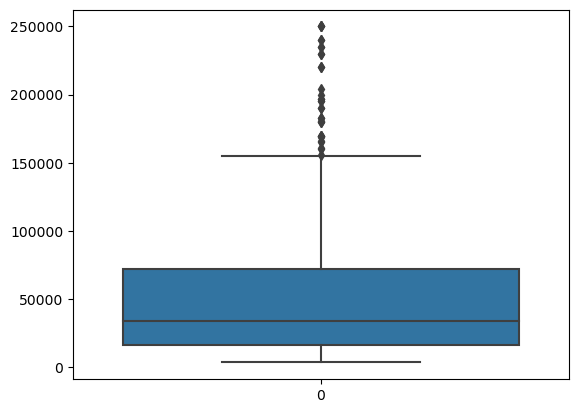

In [37]:
sea.boxplot(df1.Price)

<Axes: xlabel='Brand', ylabel='Price'>

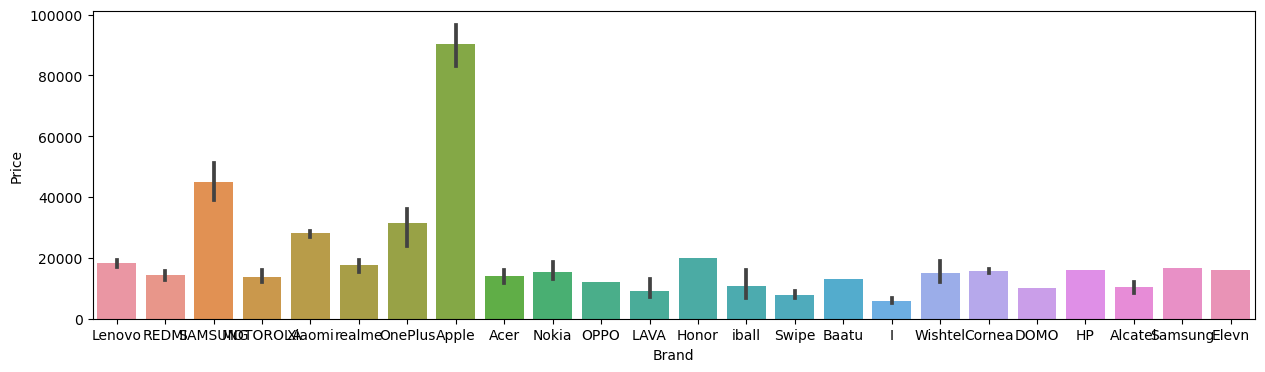

In [41]:
plt.figure(figsize=(15,4))
sea.barplot(data=df1,x='Brand',y='Price')

<Axes: xlabel='Brand', ylabel='Storage'>

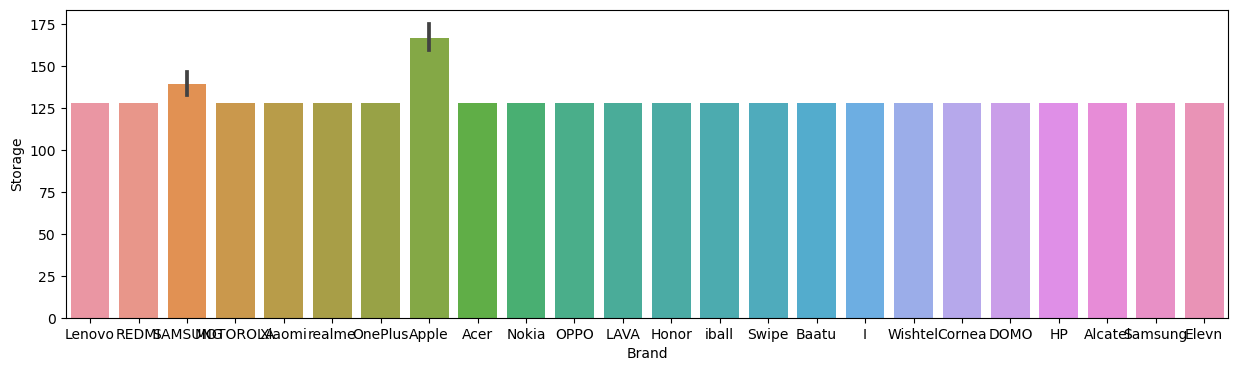

In [43]:
plt.figure(figsize=(15,4))
sea.barplot(data=df1,x='Brand',y='Storage')

<Axes: xlabel='Brand', ylabel='Battery'>

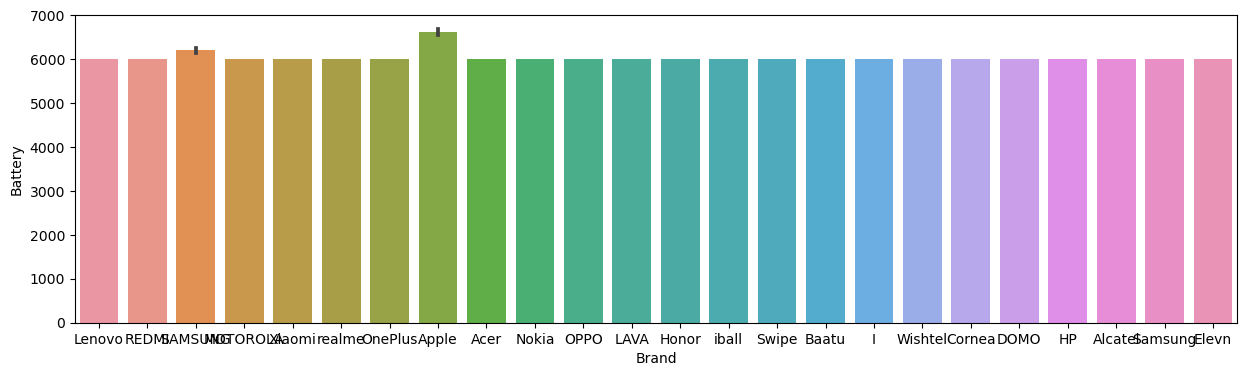

In [44]:
plt.figure(figsize=(15,4))
sea.barplot(data=df1,x='Brand',y='Battery')

<Axes: xlabel='Brand', ylabel='Primary_Camera'>

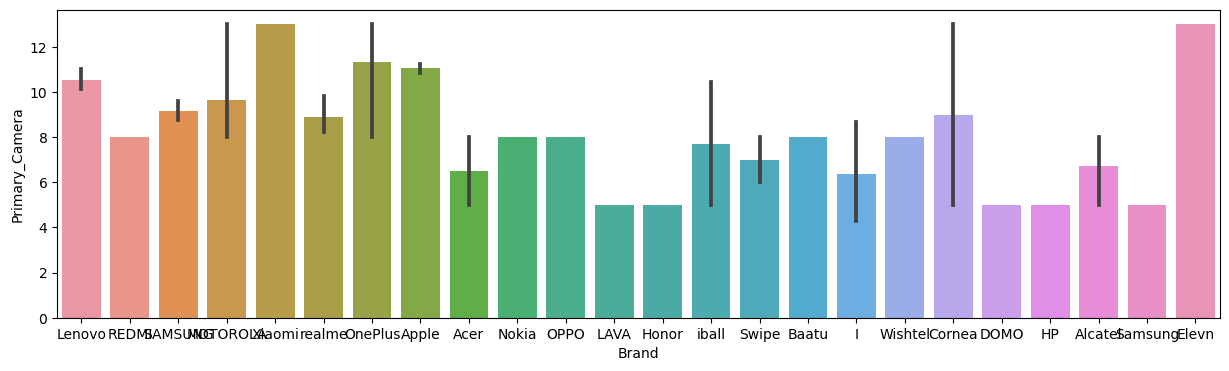

In [45]:
plt.figure(figsize=(15,4))
sea.barplot(data=df1,x='Brand',y='Primary_Camera')

# Conclusion
- According to Price,Storage and Camera "Samsung" is the best choice.